In [1]:
require(data.table)
require(cowplot)
require(ggplot2)
require(scattermore)
require(pbapply)
pboptions(type="timer")

Loading required package: data.table

Loading required package: cowplot


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Loading required package: ggplot2

Loading required package: scattermore

Loading required package: pbapply



In [2]:
root_path = "/mnt/data/Imaging/202105-Deconwolf/data_210726"

In [3]:
dots_data = readRDS(file.path(root_path, "dots_data.rds"))

In [4]:
dots_data2 = dots_data[is.finite(SNR2) & SNR2 > 0 & Value2 > 0]

# Find tentative intensity threshold for 60x datasets

### After filtering for FWHM in [0.5; 5] and selecting only dots in (selected) nuclei

In [5]:
nuclear_features = fread("../../data/selected_nuclei.tsv", key=c("sid", "nid"))

In [6]:
ddata = dots_data2[FWHM >= .5 & FWHM <= 5 & nid > 0]
setkeyv(ddata, c("series_id", "nid"))
ddata2 = nuclear_features[ddata][!is.na(size)]

In [7]:
ddata3 = ddata2["60x" == magnification]

### Choosing a threshold based on density plots over Value

In [8]:
raw_thr = .15
dw__thr = 5.3

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=09s  


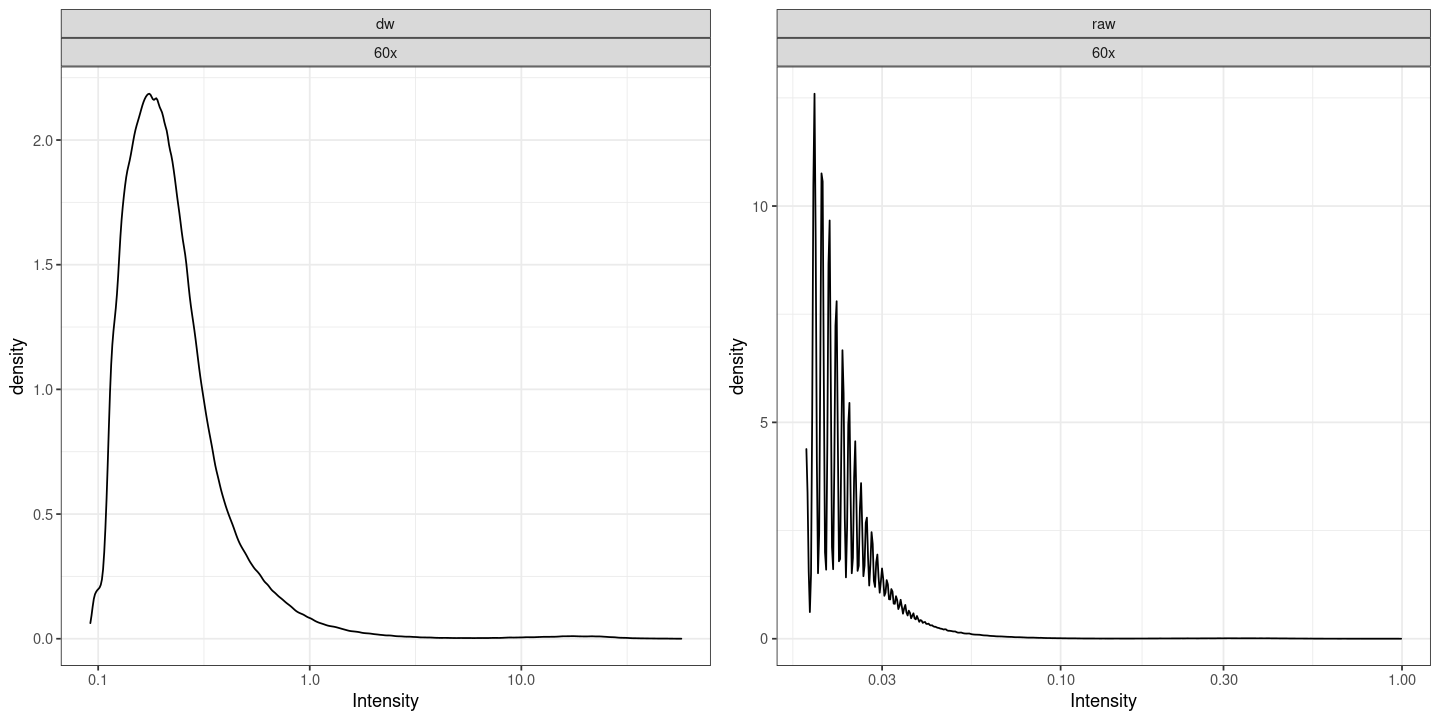

In [9]:
plist_density = pblapply(split(ddata3, list(ddata3$magnification, ddata3$image_type)),
    function(pdata) {
        p1 = ggplot(pdata, aes(x=Value2)) + geom_density() +
            facet_wrap(~image_type~magnification, scales="free") + theme_bw() +
            scale_x_log10() + labs(x="Intensity")
    }, cl=4
)
options(repr.plot.width=12, repr.plot.height=6)
plot_grid(plotlist=plist_density, nrow=1)

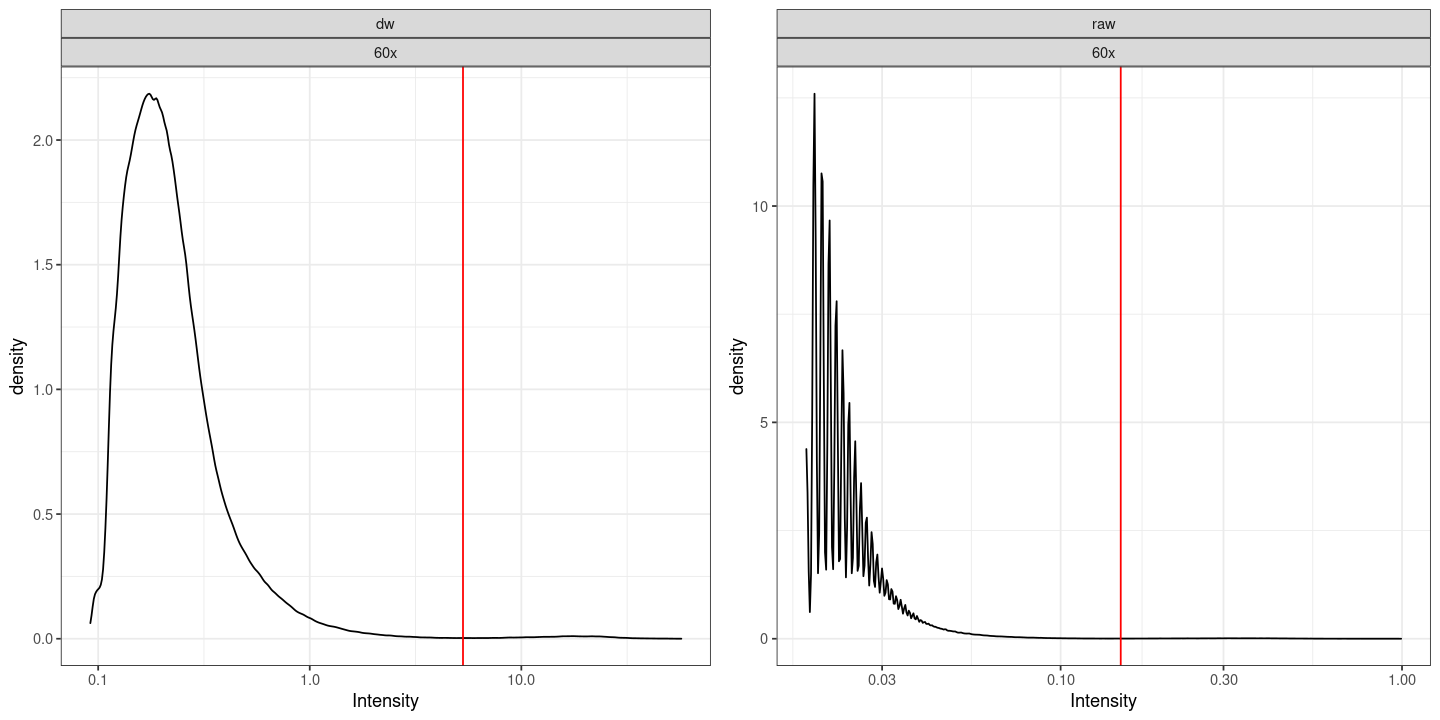

In [10]:
p1 = plist_density[[1]] + geom_vline(xintercept=dw__thr, color="red")
p2 = plist_density[[2]] + geom_vline(xintercept=raw_thr, color="red")
options(repr.plot.width=12, repr.plot.height=6)
plot_grid(p1, p2, nrow=1)

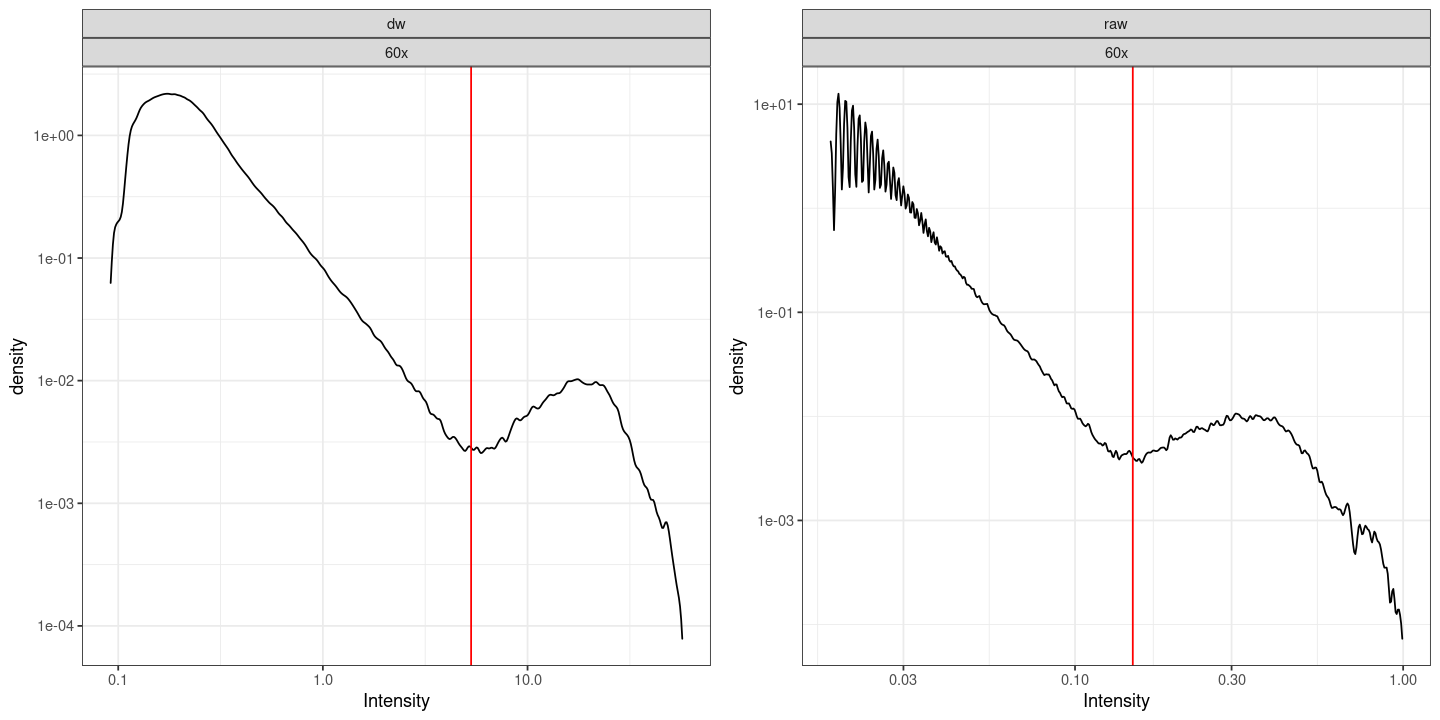

In [11]:
p1 = plist_density[[1]] + geom_vline(xintercept=dw__thr, color="red") + scale_y_log10()
p2 = plist_density[[2]] + geom_vline(xintercept=raw_thr, color="red") + scale_y_log10()
options(repr.plot.width=12, repr.plot.height=6)
plot_grid(p1, p2, nrow=1)

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=08s  


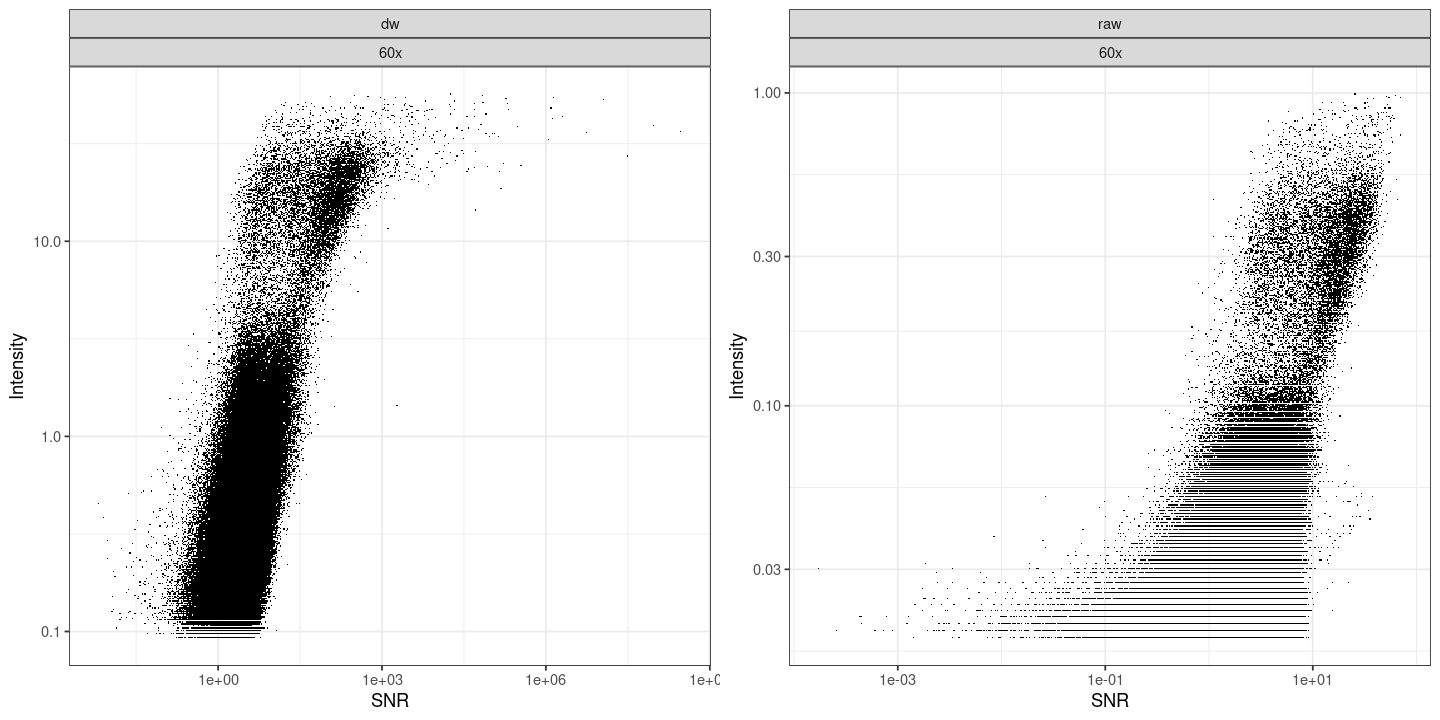

In [12]:
plist = pblapply(split(ddata3, list(ddata3$magnification, ddata3$image_type)),
    function(pdata) {
        p1 = ggplot(pdata, aes(x=SNR2, y=Value2)) + geom_scattermore() +
            facet_wrap(~image_type~magnification, scales="free") + theme_bw() +
            scale_x_log10() + scale_y_log10() + labs(x="SNR", y="Intensity")
    }, cl=4
)
options(repr.plot.width=12, repr.plot.height=6)
plot_grid(plotlist=plist, nrow=1)

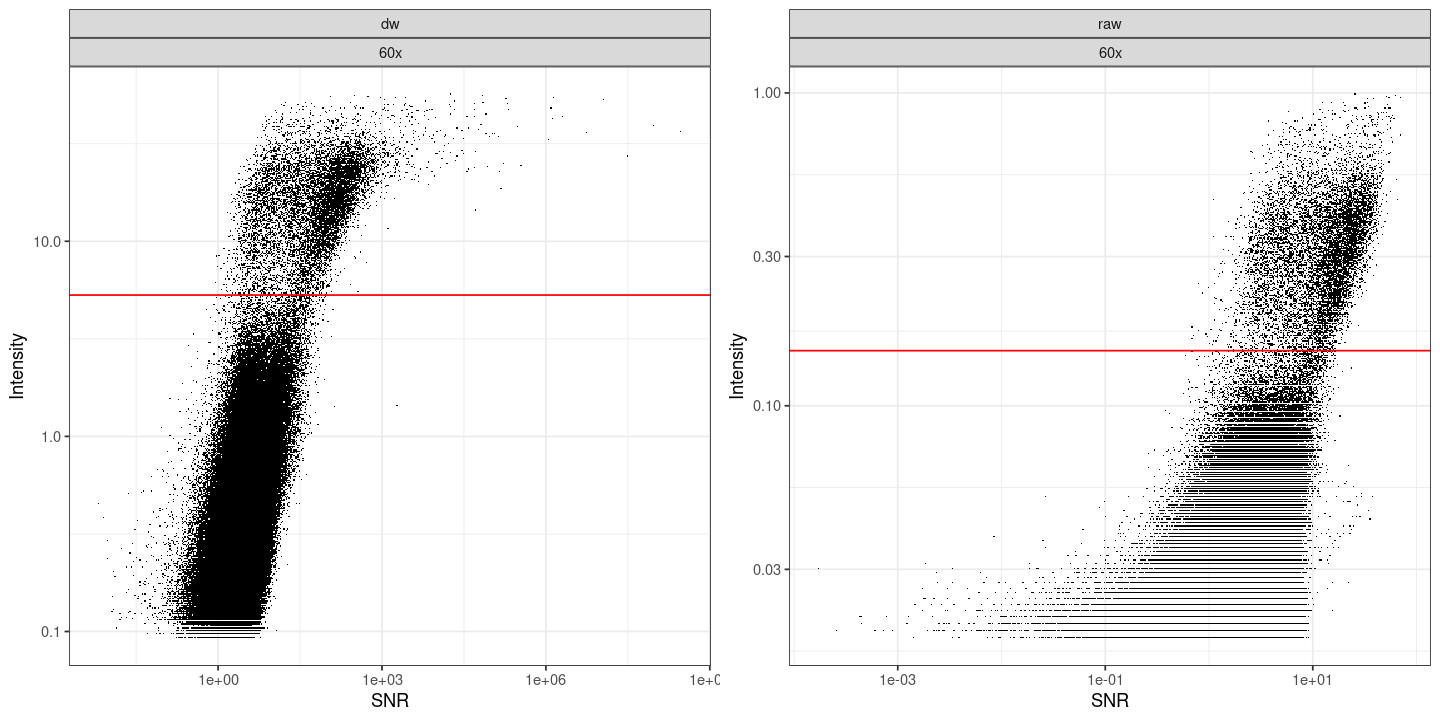

In [13]:
p1 = plist[[1]] + geom_hline(yintercept=dw__thr, color="red")
p2 = plist[[2]] + geom_hline(yintercept=raw_thr, color="red")
options(repr.plot.width=12, repr.plot.height=6)
plot_grid(p1, p2, nrow=1)